## [평가지표] 혼동 행렬 / 오차 행렬 (Confusion Matrix)
- 설명 자료 출처 : https://diseny.tistory.com/entry/%ED%98%BC%EB%8F%99%ED%96%89%EB%A0%ACconfusion-matrix

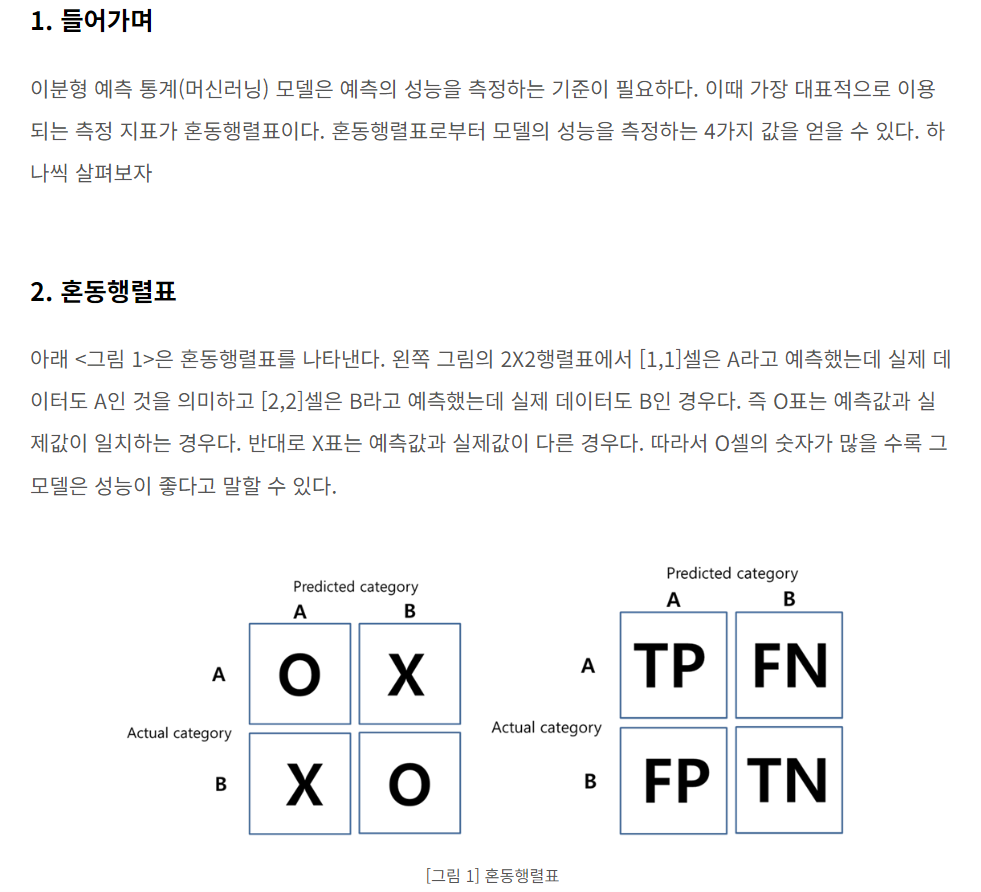
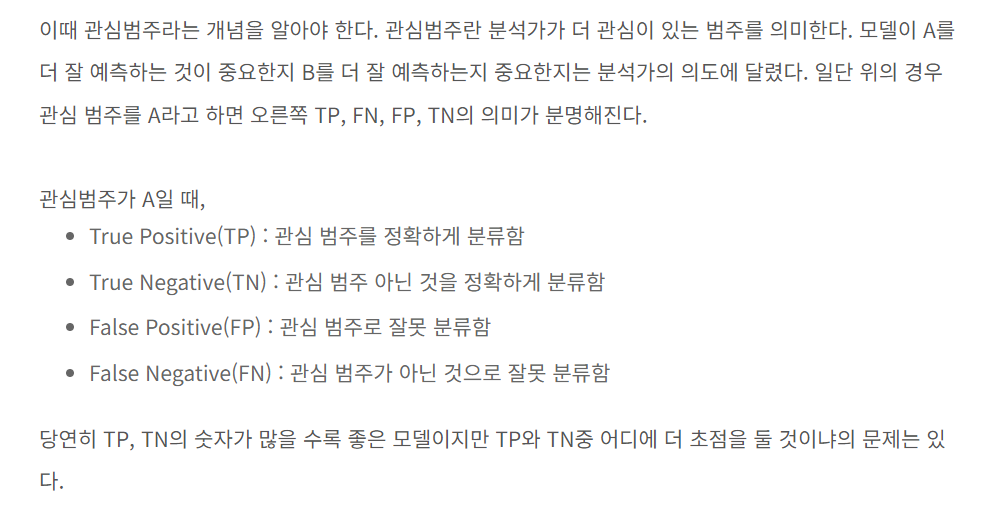

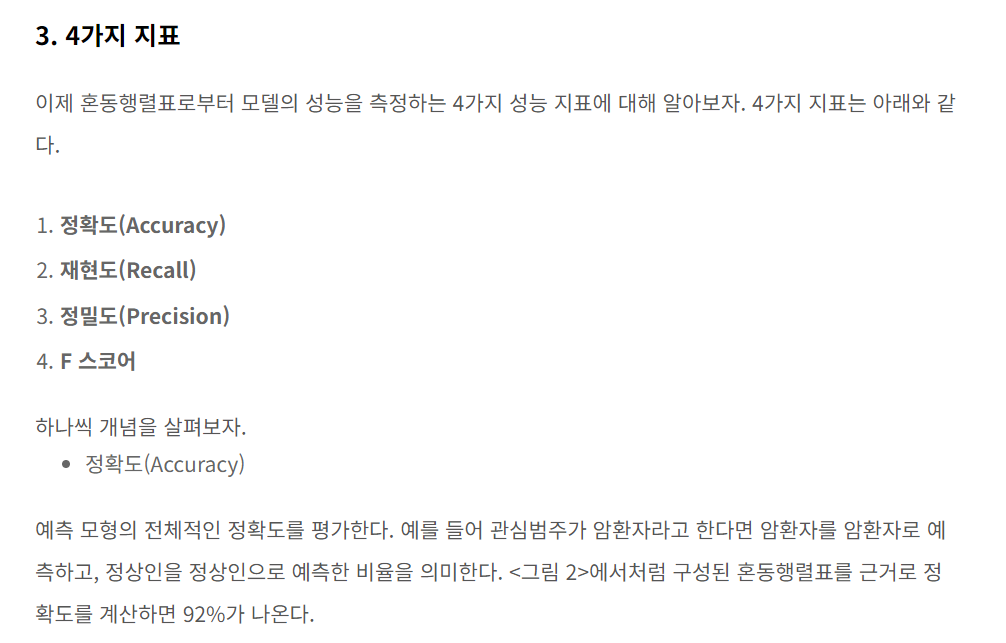

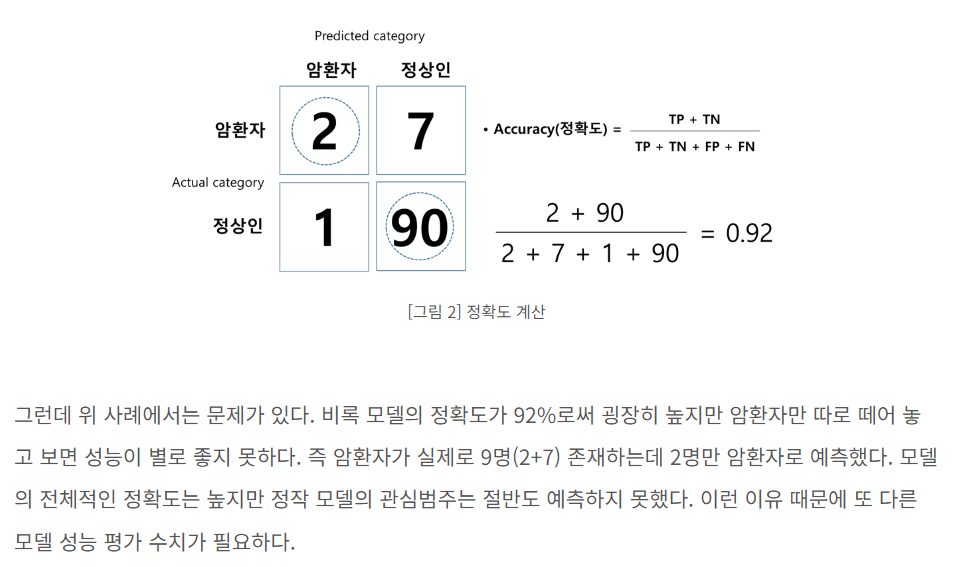

In [1]:
# 위의 예제 구현 (1:암환자, 0:정상인)
import numpy as np
Y_actual = np.array([1]*9 +[0]*91)
Y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [2]:
# 모델을 통해 예측한 값
Y_pred = np.array([1]*2 + [0]*7 + [1] + [0]*90)
Y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
## 혼동 행렬 (Confusion Matrix)
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y_actual, Y_pred)   # 반드시 (실제, 예측) 순서 준수!!!
c_matrix

array([[90,  1],
       [ 7,  2]])

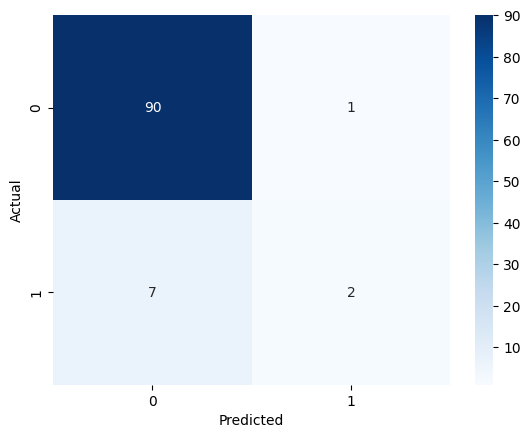

In [4]:
## Heatmap으로 혼동행렬 표현하기
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(c_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [5]:
## 맞춘 개수 
(Y_actual == Y_pred).sum()

np.int64(92)

In [6]:
## 정확도
accuracy = (Y_actual == Y_pred).mean()
accuracy

np.float64(0.92)

In [7]:
from sklearn.metrics import accuracy_score   # 정확도 계산
accuracy_score(Y_actual, Y_pred)

0.92

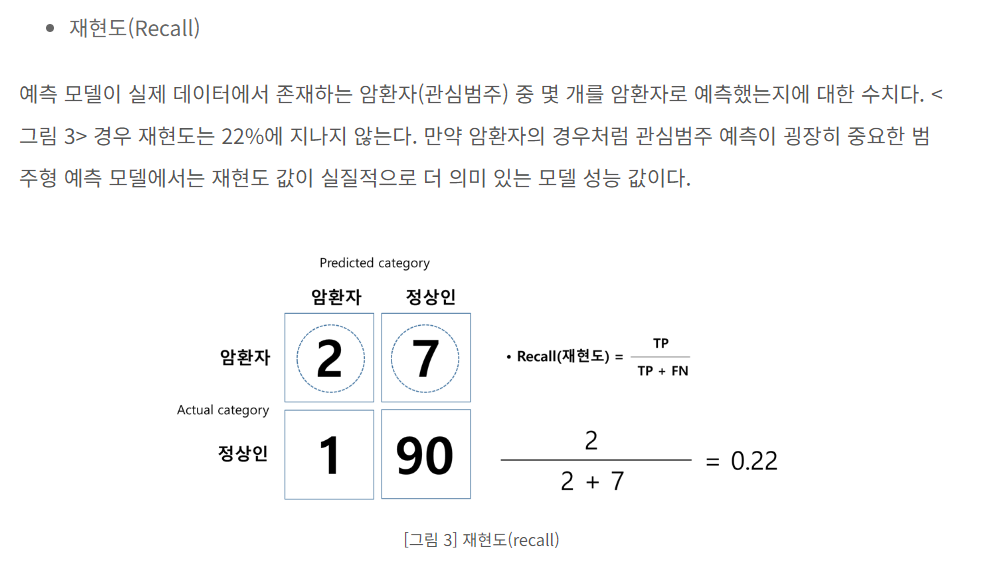

In [8]:
## 실제 암환자의 경우
c_matrix[1, :]

array([7, 2])

In [9]:
# 재현율(Recall) = True Positive Rate(TPR) : 실제 암환자(행의 인덱스 1) 중 암으로 진단한 비율
recall = c_matrix[1, 1] / c_matrix[1, :].sum()
recall

np.float64(0.2222222222222222)

In [10]:
from sklearn.metrics import recall_score
recall_score(Y_actual, Y_pred)

0.2222222222222222

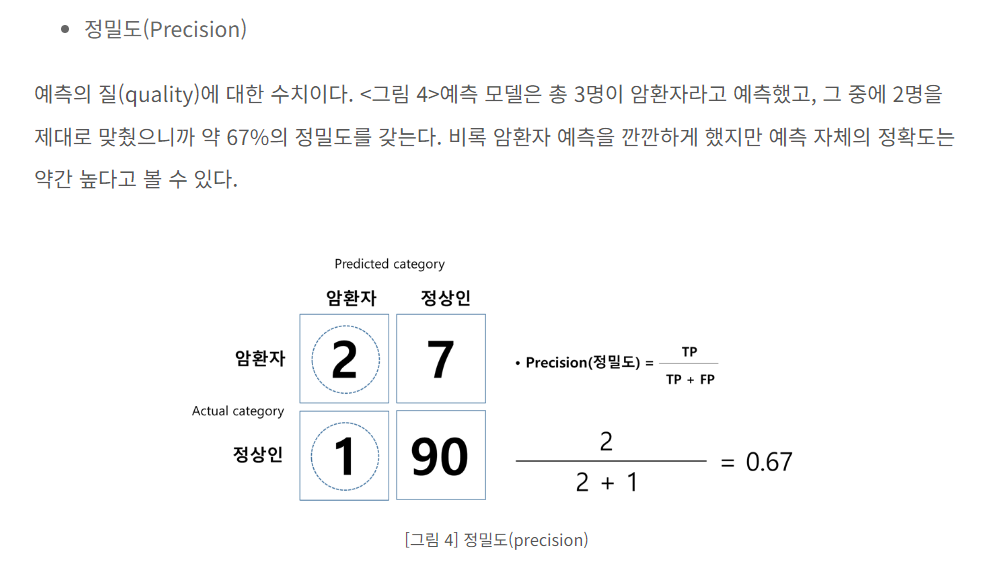

In [11]:
## 정밀도(Precision) : 암이라고 진단(예측)한 사람들 중 진짜 암환자일 확률
# 암환자라고 예측한 사람 수
c_matrix[:, 1]

array([1, 2])

In [12]:
precision = c_matrix[1, 1] / c_matrix[:, 1].sum()
precision

np.float64(0.6666666666666666)

In [ ]:
from sklearn.metrics import precision_score  # 정밀도
precision_score(Y_actual, Y_pred)

0.6666666666666666

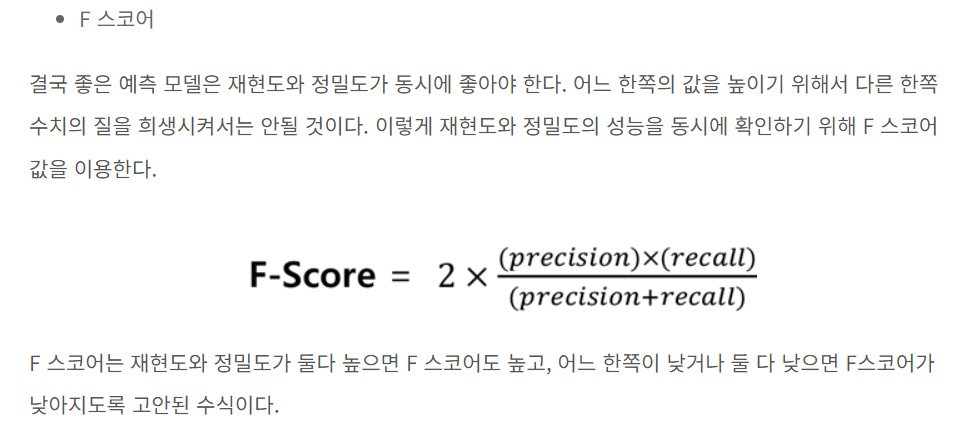

In [14]:
# F1-Score
f1_score = 2 * precision * recall / (precision + recall)
f1_score

np.float64(0.3333333333333333)

In [15]:
from sklearn.metrics import f1_score
f1_score(Y_actual, Y_pred)

0.3333333333333333

## ROC(Receiver Operating Characteristic) curve
* 참고 자료 : https://angeloyeo.github.io/2020/08/05/ROC.html

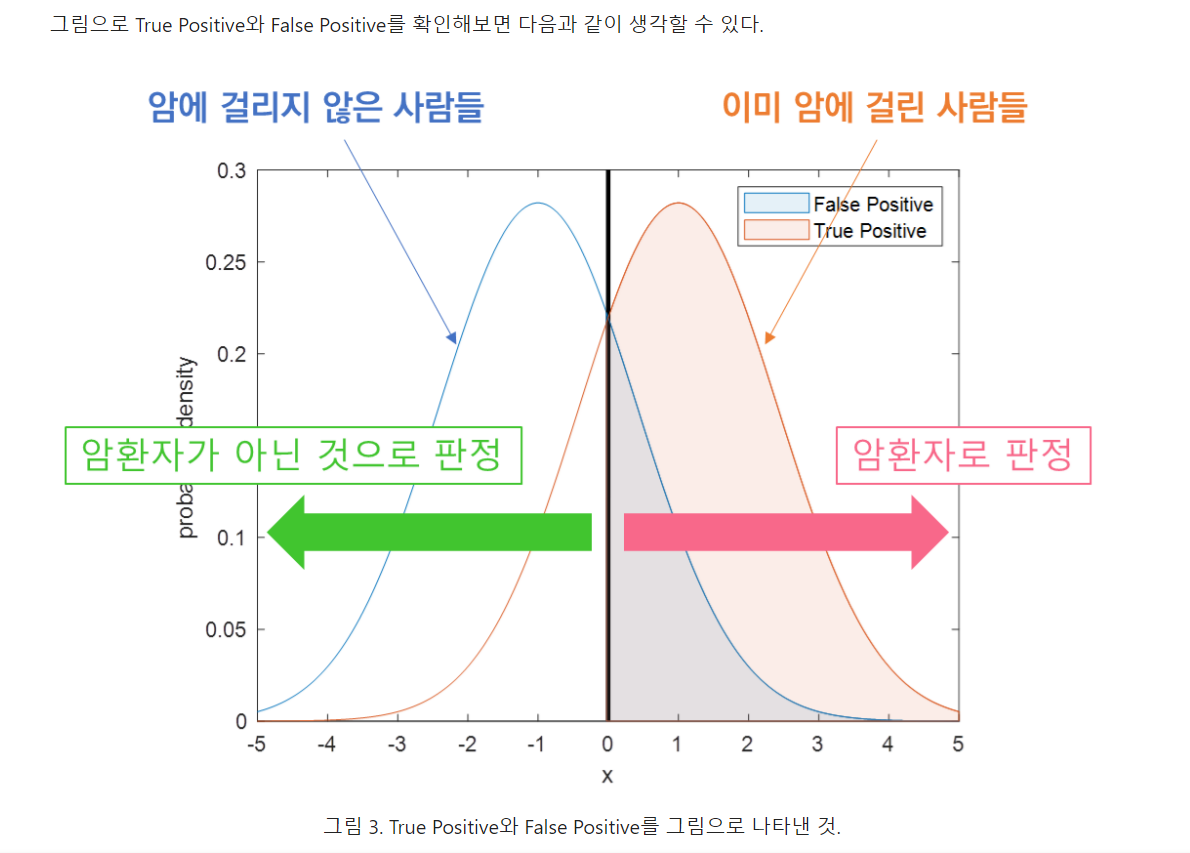

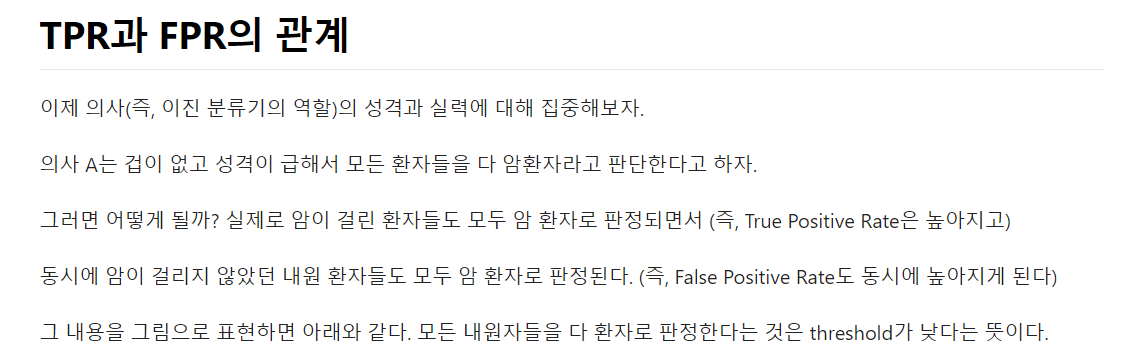

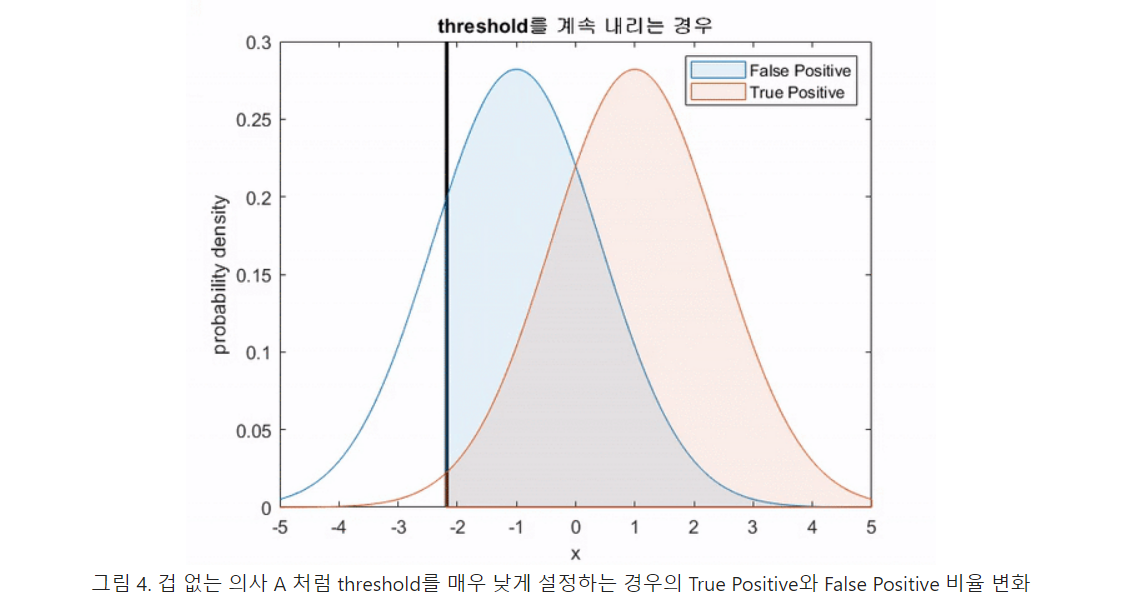

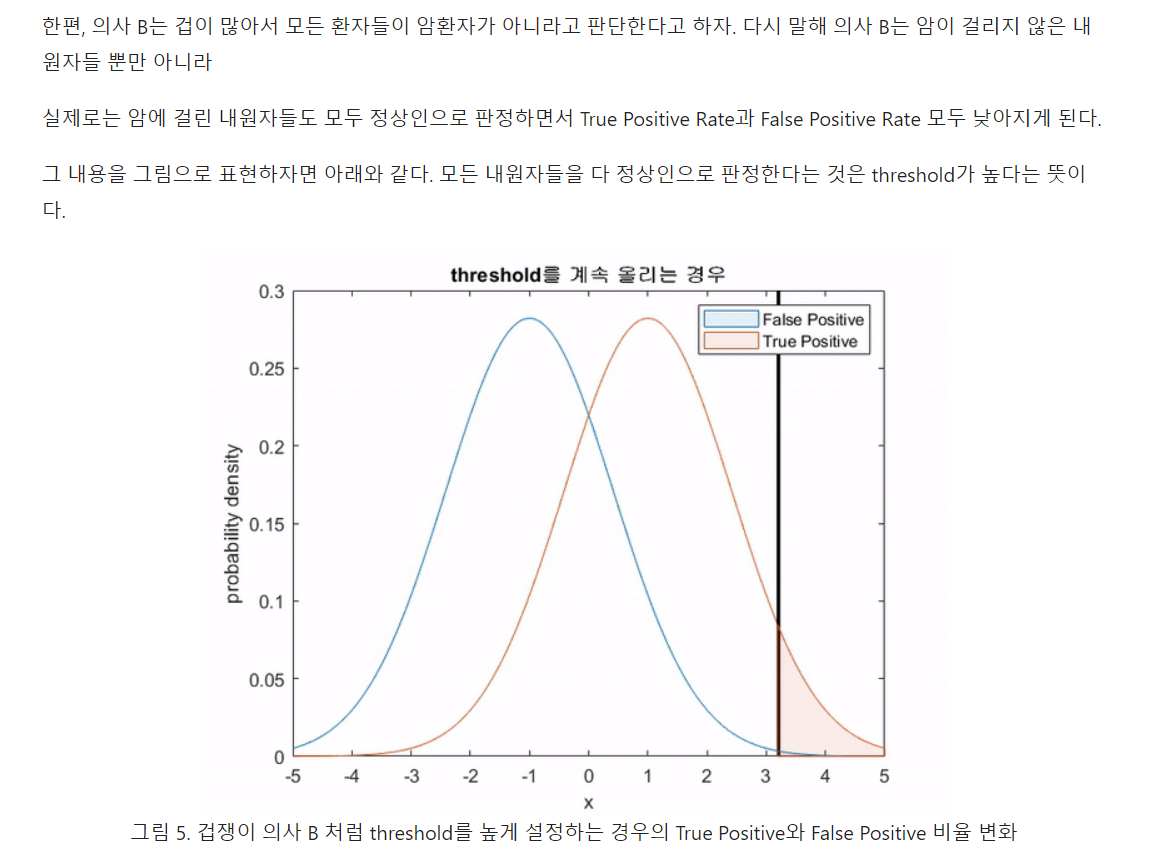

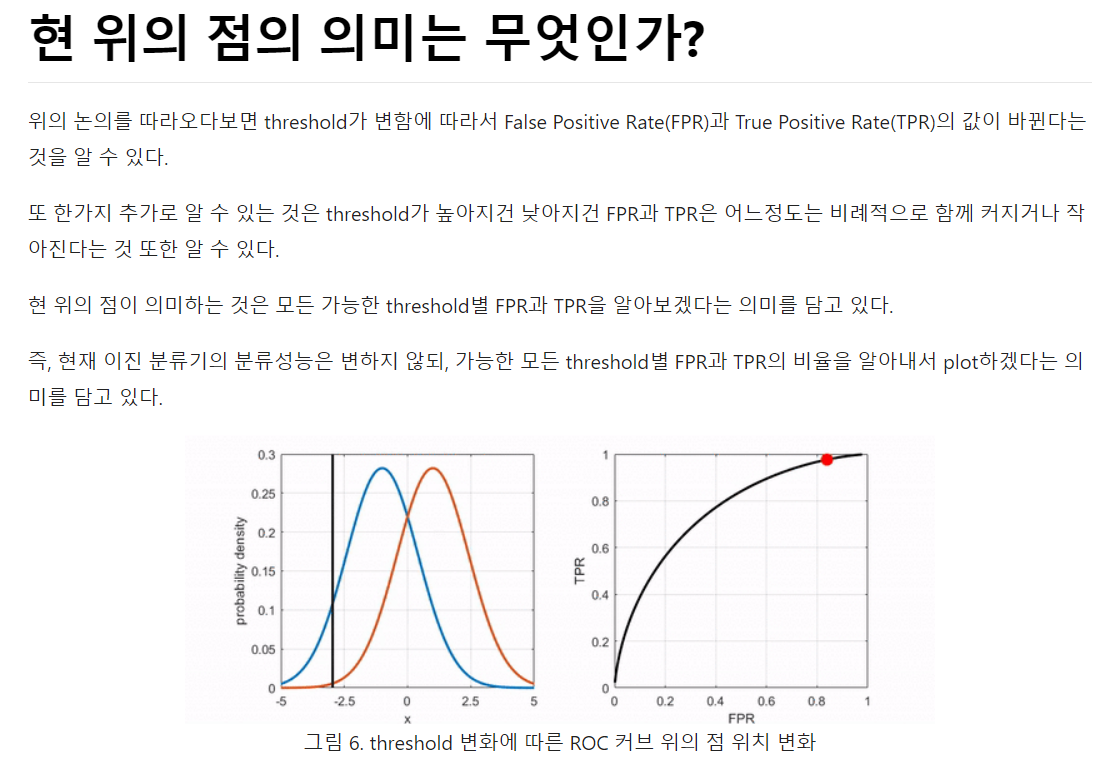

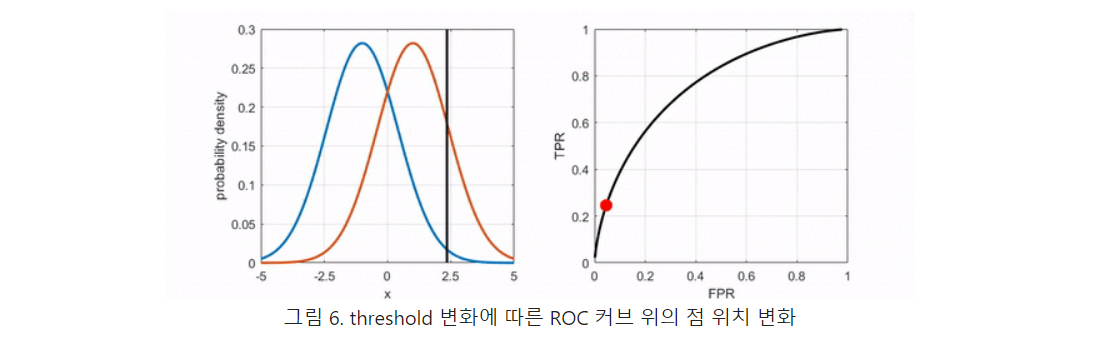

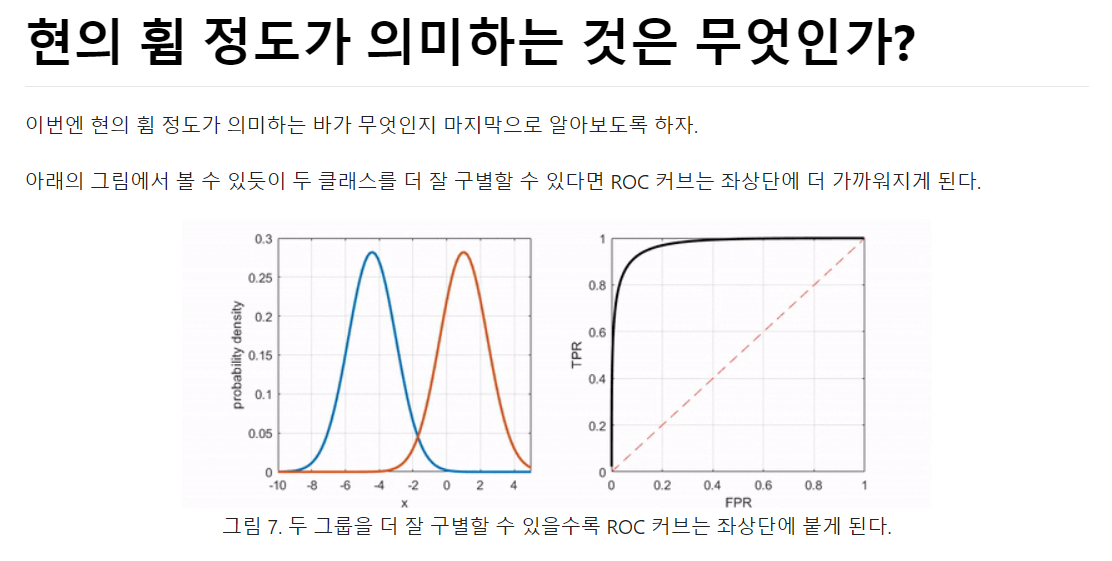

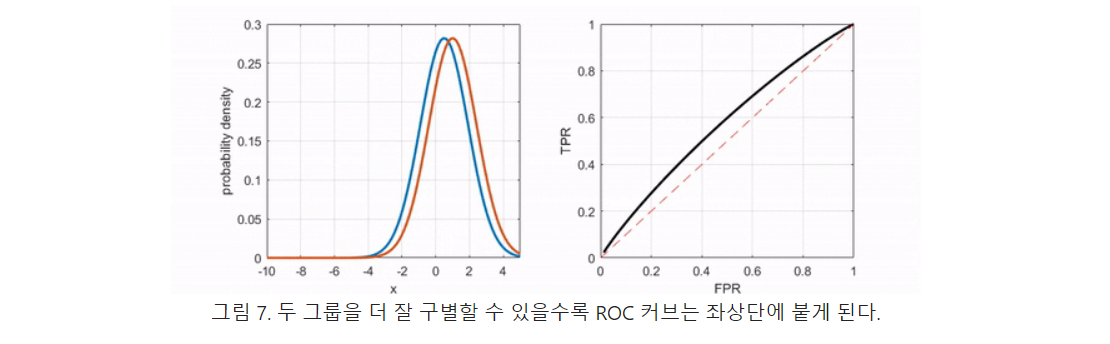

* ROC커브 설명 동영상: https://youtu.be/n7EoYT5kDO4?si=N8EkZJfbVFxMXjZV

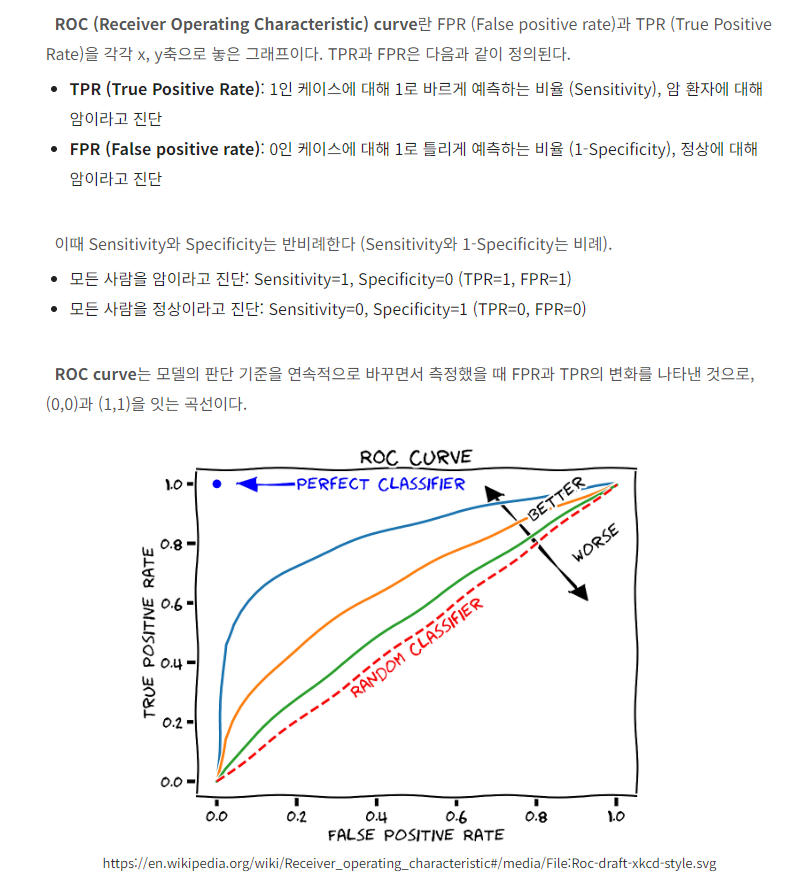
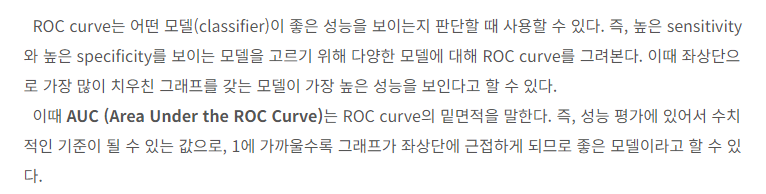

In [16]:
## AUC (Area Under the ROC Curve)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_actual, Y_pred)
auc

0.6056166056166057

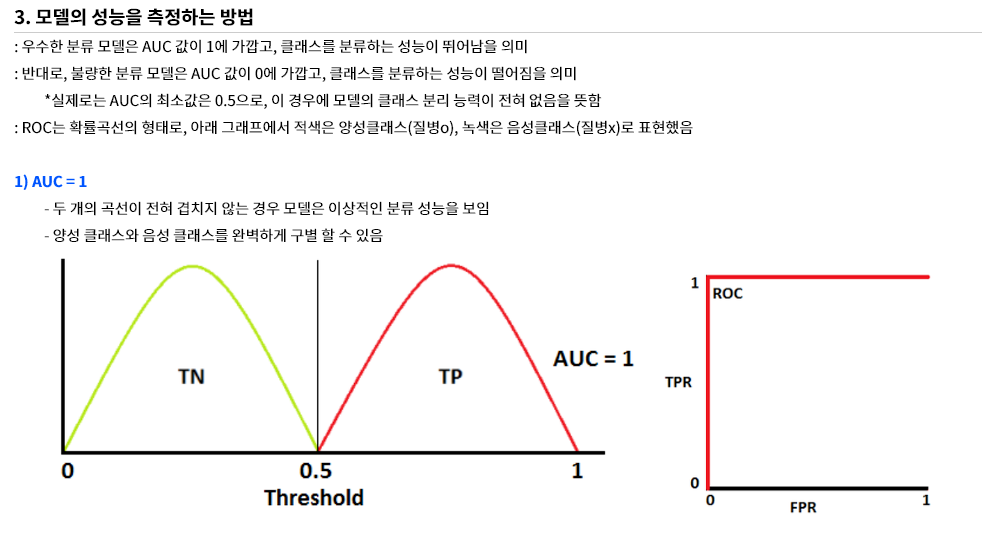

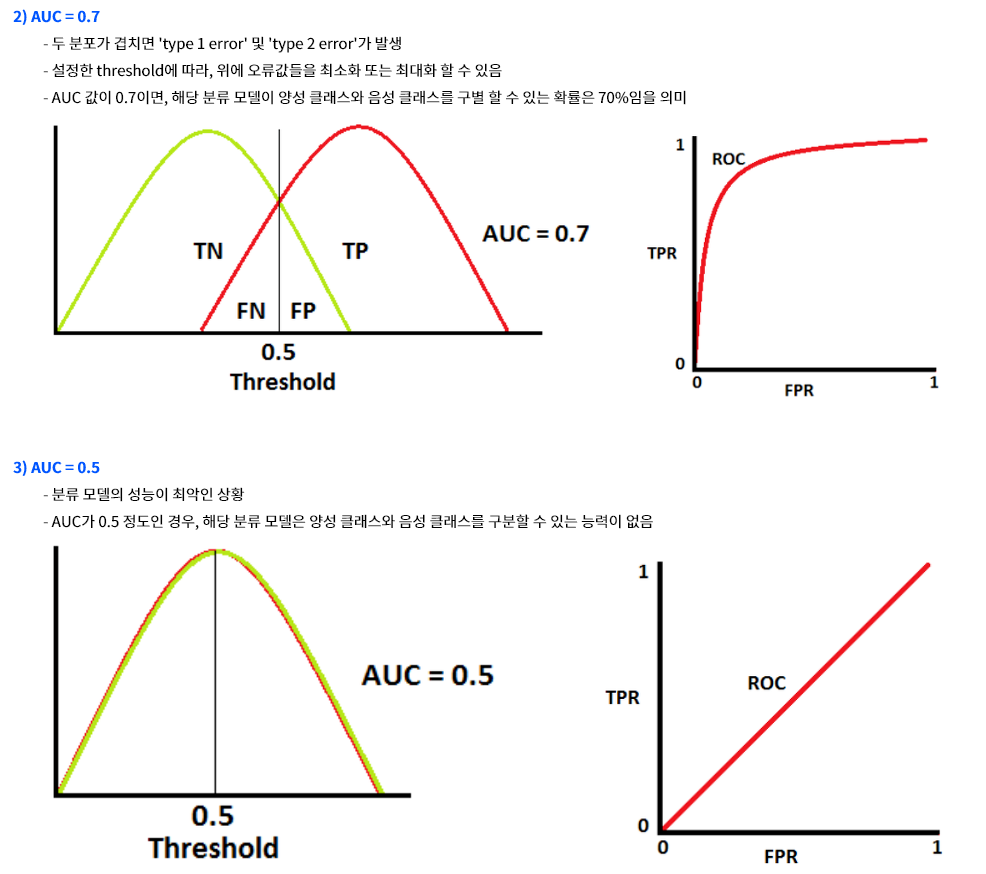

### 3개 클래스의 혼동 행렬 예제

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_actual = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_pred = [0, 0, 2, 0, 2, 2, 1, 1, 2]
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[2 1 0]
 [1 1 1]
 [0 0 3]]


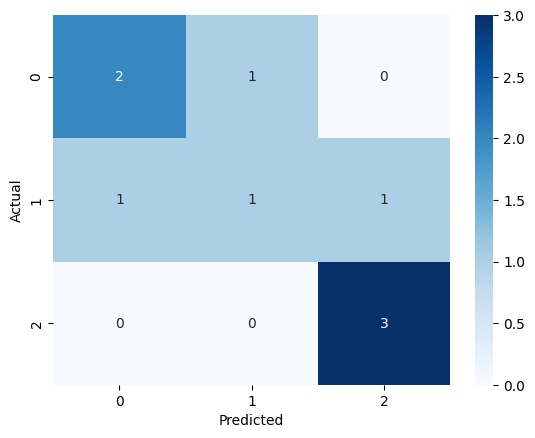

In [18]:
## Heatmap으로 혼동행렬 표현하기
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# normalize='true' 옵션을 사용하여 오차 행렬을 실제 값으로 가진 전체 샘플 수로 나누어 정규화한 결과를 출력합니다
cm = confusion_matrix(y_actual, y_pred, normalize='true')
cm

array([[0.66666667, 0.33333333, 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 1.        ]])

이 결과는 각 클래스당 실제 값으로 가진 샘플 수에 대한 비율을 나타냅니다. 첫 번째 클래스(0)는 3개의 샘플 중 2개가 올바르게 분류되어 약 66.67%의 비율을 나타냅니다. 두 번째 클래스(1)는 3개의 샘플 중 1개가 올바르게 분류되어 33.33%의 비율을 나타냅니다. 세 번째 클래스(2)는 3개의 샘플 모두가 올바르게 분류되어 100%의 비율을 나타냅니다.

In [20]:
## 각 행의 합은 1
cm.sum(axis=1)

array([1., 1., 1.])

In [21]:
## 각 열의 합은 의미 없음!
cm.sum(axis=0)

array([1.        , 0.66666667, 1.33333333])